In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/housesalesprediction/kc_house_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../input/housesalesprediction/kc_house_data.csv')
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.describe().T.head(2)

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1000102.0,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,75000.0,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06


In [6]:
pd.merge(df.describe().T, 
         pd.DataFrame(df.dtypes, columns=['data type']),
         how='right',
         left_index=True, 
         right_index=True).applymap(lambda x: '-' if pd.isnull(x) else x)

,count,mean,std,min,25%,50%,75%,max,data type
id,21613.0,4580301520.864988,2876565571.312057,1000102.0,2123049194.0,3904930410.0,7308900445.0,9900000190.0,int64
date,-,-,-,-,-,-,-,-,object
price,21613.0,540088.141767,367127.196483,75000.0,321950.0,450000.0,645000.0,7700000.0,float64
bedrooms,21613.0,3.370842,0.930062,0.0,3.0,3.0,4.0,33.0,int64
bathrooms,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0,float64
sqft_living,21613.0,2079.899736,918.440897,290.0,1427.0,1910.0,2550.0,13540.0,int64
sqft_lot,21613.0,15106.967566,41420.511515,520.0,5040.0,7618.0,10688.0,1651359.0,int64
floors,21613.0,1.494309,0.539989,1.0,1.0,1.5,2.0,3.5,float64
waterfront,21613.0,0.007542,0.086517,0.0,0.0,0.0,0.0,1.0,int64
view,21613.0,0.234303,0.766318,0.0,0.0,0.0,0.0,4.0,int64


<Figure size 720x432 with 0 Axes>

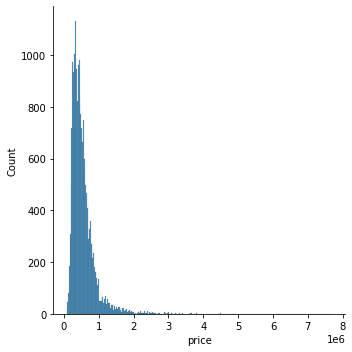

In [7]:
plt.figure(figsize=(10, 6))
sns.displot(df['price'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


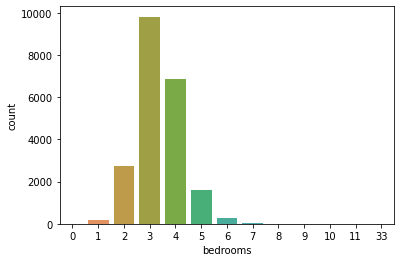

In [8]:
sns.countplot(df['bedrooms']);

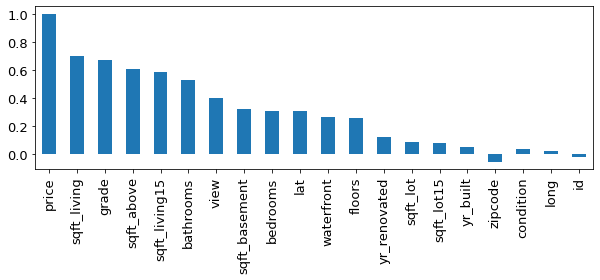

In [9]:
plt.rcParams.update({'font.size': 13})
df.corr()['price'].sort_values(key=lambda x: abs(x), ascending=False).plot.bar(figsize=(10, 3));

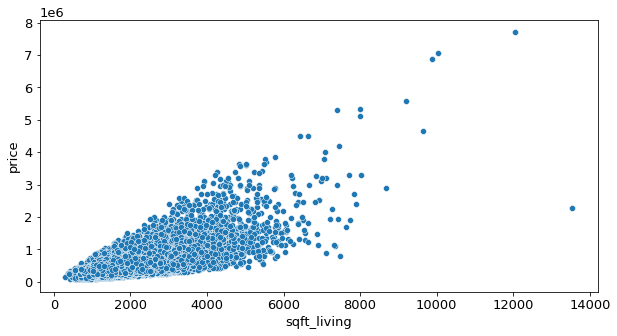

In [10]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='sqft_living', y='price', marker='o', data=df);

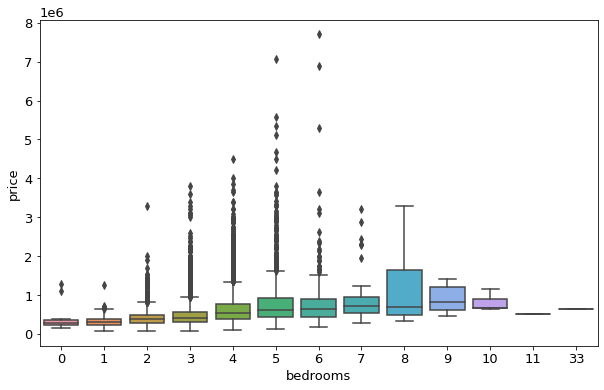

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=df);

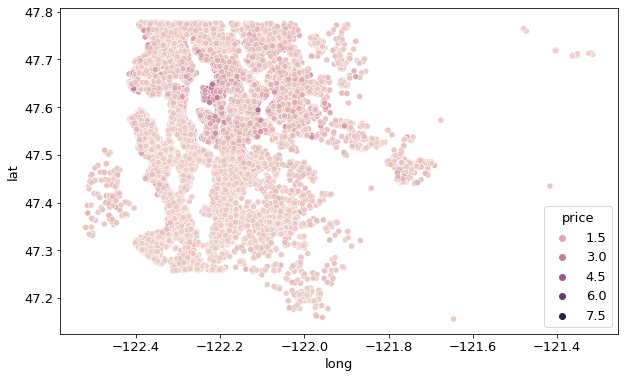

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='long', y='lat', hue='price', data=df);

In [13]:
non_top_1_pct = df[df['price'] >= df['price'].quantile(q=0.01)]
non_top_1_pct.shape, df.shape

((21396, 21), (21613, 21))

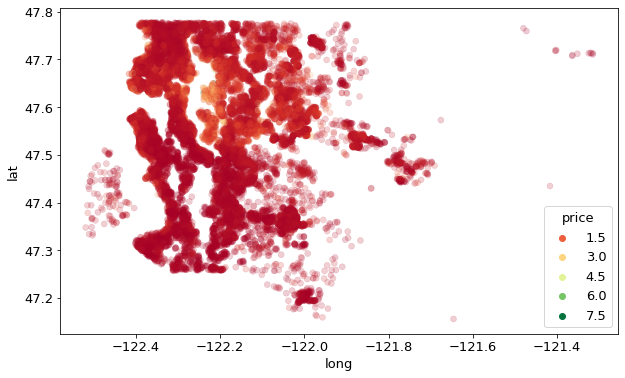

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='long', y='lat', hue='price', data=non_top_1_pct,
                edgecolor=None, palette='RdYlGn', alpha=0.2);

In [15]:
df.drop('id', axis=1, inplace=True)

In [16]:
df['date'] = pd.to_datetime(df['date'])
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [17]:
df['year'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: x.month)
df.head().T

,0,1,2,3,4
date,2014-10-13 00:00:00,2014-12-09 00:00:00,2015-02-25 00:00:00,2014-12-09 00:00:00,2015-02-18 00:00:00
price,221900.0,538000.0,180000.0,604000.0,510000.0
bedrooms,3,3,2,4,3
bathrooms,1.0,2.25,1.0,3.0,2.0
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1.0,2.0,1.0,1.0,1.0
waterfront,0,0,0,0,0
view,0,0,0,0,0
condition,3,3,3,5,3


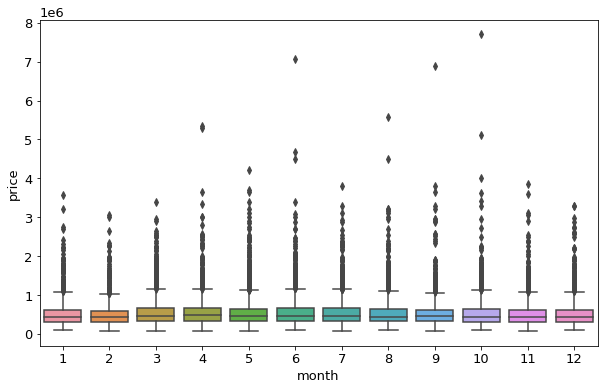

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='price', data=df);

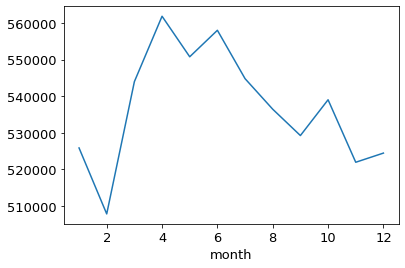

In [19]:
# visually inspect the correlation between house pricing and the sales month of the year
df.groupby('month')['price'].mean().plot();

In [20]:
df.drop('date', axis=1, inplace=True)
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [21]:
df['zipcode'].value_counts().shape[0], df.shape[0]

(70, 21613)

In [22]:
# Drop the zipcode column for simplicity
df.drop('zipcode', axis=1, inplace=True)

In [23]:
df['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2007       35
        ...  
1948        1
1954        1
1951        1
1944        1
1959        1
Name: yr_renovated, Length: 70, dtype: int64

Although there are many `0` values in the yr_renovated column that implies that the house is not renovated, because year renovated has a positive correlation with the price, and `0` is the least possible value, we are going to keep data as is

There is a similar situation with `sqft_basement`

In [24]:
df['sqft_basement'].value_counts()

0       13126
600       221
700       218
500       214
800       206
        ...  
65          1
1248        1
172         1
1920        1
1135        1
Name: sqft_basement, Length: 306, dtype: int64

Although sqft_basement with `0`  means no basement that is actually a categorical feature, we are going to keep the data as is, considering that the data is positively correlated with `price`

In [25]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [28]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
X_train.shape, X_test.shape

((15129, 19), (6484, 19))

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',
              loss='mse')

In [31]:
model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          batch_size=128,
          epochs=100,
          verbose=0)

In [32]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

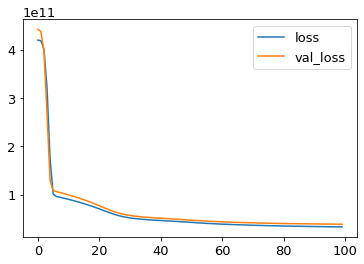

In [33]:
losses.plot()

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [35]:
predictions = model.predict(X_test)

In [36]:
root_mse = np.sqrt(mean_squared_error(y_test, predictions))
root_mse

196849.27407262006

In [37]:
mae = mean_absolute_error(y_test, predictions)
mae

117965.3082172222

In [38]:
# How much variance is bein explained by the model
explained_variance_score(y_test, predictions)

0.731963490862916

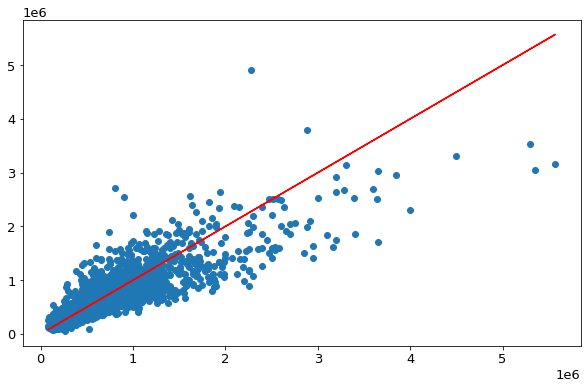

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')